[*********************100%***********************]  6 of 6 completed


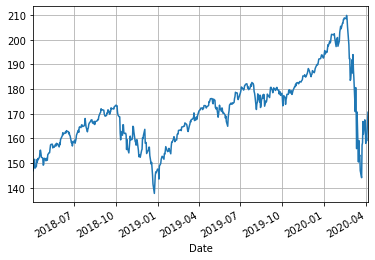

In [162]:
# -*- coding: utf-8 -*-
"""
Created on Wed Mar 18 20:17:53 2020

@author: robert_normand
"""

#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
# Download Data from Yahoo Finance
import datetime
import matplotlib.pyplot as plt
import pandas as pd
# Pour lire les données de Yahoo Finance, vous devez installer le toolbox yfinance
import yfinance as yf 

start_sp = datetime.datetime(2018,3,31)
end_sp = datetime.datetime(2020, 12,31)

# Use Vanguard ETF
# SP500 Index + 11 Industry

BLack_ETF=['IVV','IWF','IJH','IJR','IWM','IVW']


#BLack_ETF=['IVV','IWF','IJH','IJR','IWM','IWD','ITOT','IVW','IWB','IWR','DVY',
#           'IVE','IWP','IWS','IWV','IUSG','IWO','IWN','IBB','IJK','IUSV',
#           'OEF','IJS','IJJ','IYW','IHI','IJT','ITA','IGV','IYH','SOXX','EWC',
#           'IGM','IYF','JKE','SUSA','IDU','IYY','IYG','JKD','IYC','IYJ','JKG',
#           'IWC','IYK','JKF','JKH','IYT','JKI','IYZ','IGE','IYE','JKL','IYM',
#           'JKJ','JKK','IGN']

Data = yf.download(BLack_ETF, start=start_sp, end=end_sp,group_by="ticker")

# To access data for SP500
SP500_dat=Data['IVW']

# To access the adjusted close price, use
Data['IVW']['Adj Close']

# Graph data
Data['IVW']['Adj Close'].plot(grid=True)

# To get Information about a ticker
SP500_detail = yf.Ticker("IVW")

# Show stock info
#SP500_detail.info


In [163]:
#SP500_dat

In [164]:
#les rendements quotidiens
from pandas_datareader import data, wb
df = pd.DataFrame([data.DataReader(etf, 'yahoo', start_sp, end_sp)['Adj Close'] for etf in BLack_ETF]).T
df.columns = BLack_ETF
rendement = df.pct_change()
#rendement

In [165]:
# Mettre le rendement en 0 = descente 1= montée
j=1
for ticker in BLack_ETF:
    for j in range(len(rendement)):
        if rendement[ticker][j]<0:
            rendement[ticker][j]=0
        else:
            rendement[ticker][j]=1
rendement_bin=rendement
#rendement_bin

# Pour chacun des ETF, vous fournissez les statistiques de base

a.	Rendement moyen, volatilité, quantile, etc.

In [166]:
list_etf = []
for etf in BLack_ETF:
    list_etf.append(df[etf].describe())

b.	L’analyse peut être présentée sous forme de tableaux et graphiques 

In [167]:
#list_etf

In [168]:
df_describe = pd.DataFrame(list_etf)

In [169]:
#df_describe

2.	Par la suite, vous validez la performance des 5 indicateurs techniques appliqués sur chaque ETF

a.	Vous calculez la performance du signal

In [170]:
from Data_TP2_V2 import BBANDS, STOK, MACD, RSI, MFI

###### BollingerBands, Oscilateur stochastique, MACD, RSI, Money Flow

#### 1- Indicateurs

In [171]:
result_BB = pd.DataFrame()
result_STOK = pd.DataFrame()
result_MACD = pd.DataFrame()
result_RSI = pd.DataFrame()
result_MFI = pd.DataFrame()

for ticker in BLack_ETF:
    daf = BBANDS(Data[ticker],"Close",21,2)
    result_BB[ticker+'_HIGH'] = daf.iloc[:,-1]
    result_BB[ticker+'_LOW'] = daf.iloc[:,-2]
    
    daf = STOK(Data[ticker])
    result_STOK[ticker] = daf.iloc[:,-1]
    
    daf = MACD(Data[ticker],"Adj Close",5,25,9)
    result_MACD[ticker] = df.iloc[:,-1]
    result_MACD[ticker+'_SIGN'] = daf.iloc[:,-2]
    result_MACD[ticker+'_DIFF'] = daf.iloc[:,-3]
    
    daf = RSI(Data[ticker],14)
    result_RSI[ticker] = daf.iloc[:,-1]
    
    daf = MFI(Data[ticker],14)
    result_MFI[ticker] = daf.iloc[:,-1]
    

In [172]:
#result_MACD

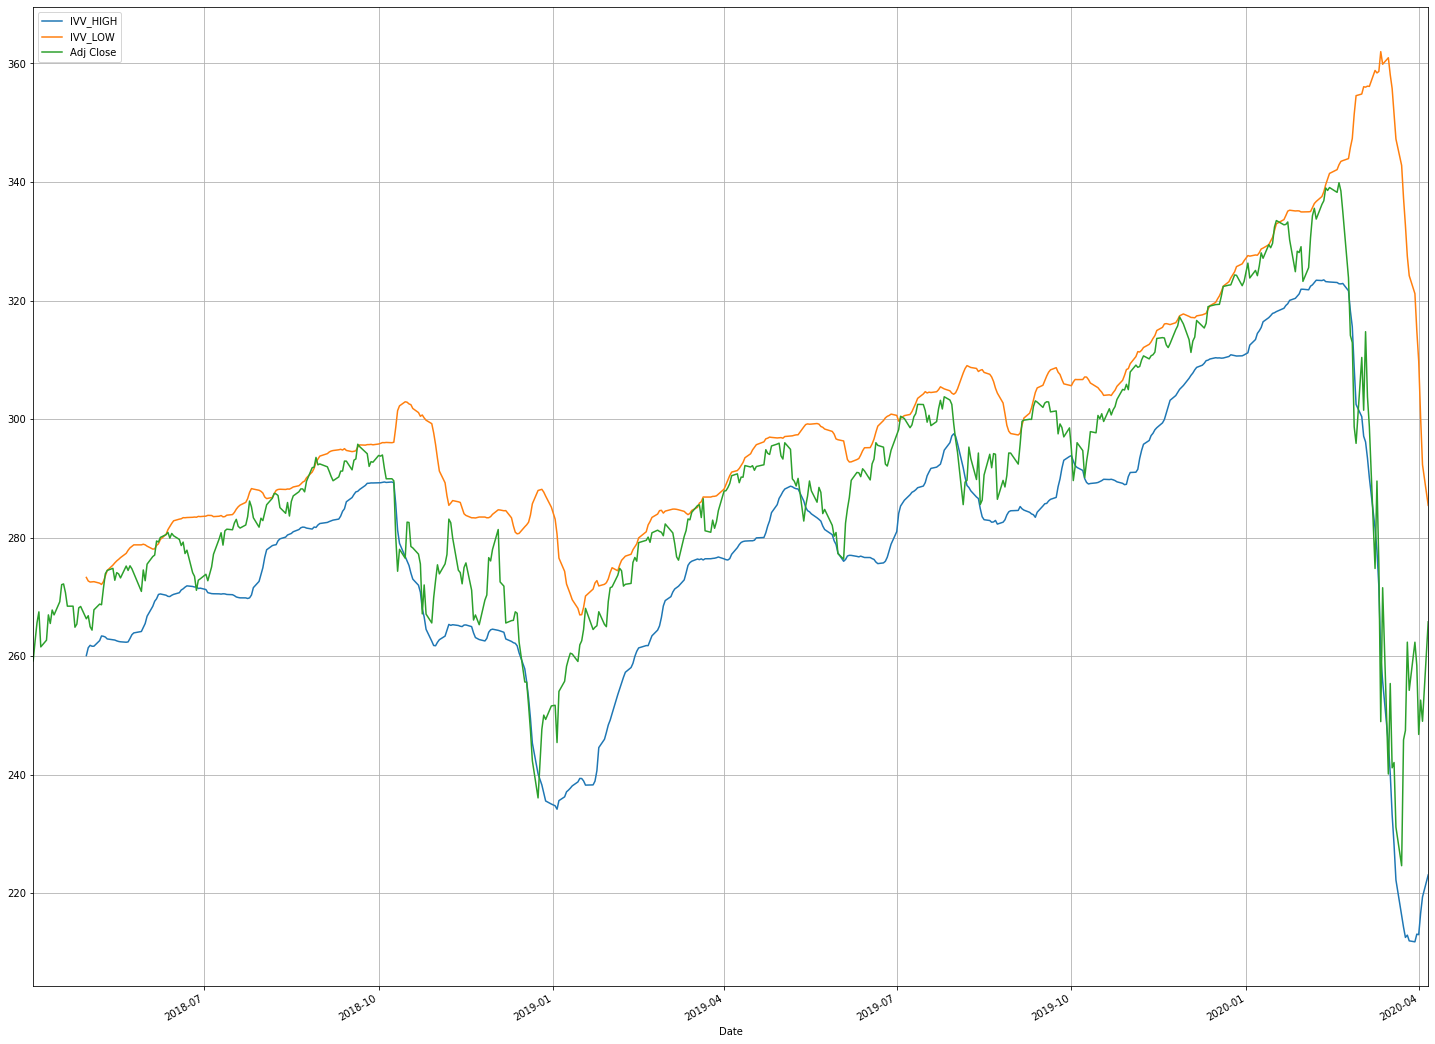

In [173]:
#Exemple de graphique
df = pd.DataFrame()
mycolumn=['IVV_HIGH','IVV_LOW']
df[mycolumn]= result_BB[mycolumn]
df['Adj Close'] = Data['IVV']['Close']
df.plot(grid=True, figsize = (25,20))

### 2 - Signal

#### Bollinger Bands

Pour Bollinger Bands si close price est supérieure à +2SD -> Long
                     ; si close price est inférieure à -2SD -> Short
                     ; sinon Neutral

In [174]:
Signal_BBAND = Data
for ticker in BLack_ETF:
    i = 0
    signal = []
    while i <= len(df.index)-1: 
        haut_BB = result_BB[ticker+'_HIGH'][i]
        bas_BB = result_BB[ticker+'_LOW'][i]
        haut_stock = Data[ticker]['High'][i]
        bas_stock = Data[ticker]['Low'][i]
        if haut_stock > haut_BB:
            Sig = 1
        elif bas_stock < bas_BB:
            Sig = -1
        else:
            Sig = 0
        signal.append(Sig)
        i=i+1
    S = pd.Series(signal, name = 'Signal_BBAND', index = df.index)
    S2D = pd.DataFrame(columns = pd.MultiIndex.from_tuples([(ticker, 'Signal_BBAND')]))
    S2D[ticker] = S
    Signal_BBAND = Signal_BBAND.join(S2D)

#### Oscillateur stochastique

Pour Oscillateur stochastique si Stok =< 20 -> Long
                              ;si Stok >= 80 -> Short
                              ;sinon Neutral

In [175]:
Signal_STOK = Data
for ticker in BLack_ETF:
    i = 0
    signal = []
    while i <= len(df.index)-1: 
        stok = result_STOK[ticker][i]
        if stok <= 0.20:
            Sig = 1
        elif stok >= 0.80:
            Sig = -1
        else:
            Sig = 0
        signal.append(Sig)
        i=i+1
    S = pd.Series(signal, name = 'Signal_STOK', index = df.index)
    S2D = pd.DataFrame(columns = pd.MultiIndex.from_tuples([(ticker, 'Signal_STOK')]))
    S2D[ticker] = S
    Signal_STOK = Signal_STOK.join(S2D)

#### MACD

Pour MACD si MACDdiff > 0 -> Long
          ;si MACDdiff < 0 -> Short
          ;si MACDdiff = 0 -> Neutral

In [176]:
Signal_MACD = Data
for ticker in BLack_ETF:
    i = 0
    signal = []
    while i <= len(df.index)-1:
        MACD = result_MACD[ticker+'_DIFF'][i] 
        if MACD > 0:
            Sig = 1
        elif MACD == 0:
            Sig = 0
        else:
            Sig = -1
        signal.append(Sig)
        i=i+1
    S = pd.Series(signal, name = 'Signal_MACD', index = df.index)
    S2D = pd.DataFrame(columns = pd.MultiIndex.from_tuples([(ticker, 'Signal_MACD')]))
    S2D[ticker] = S
    Signal_MACD = Signal_MACD.join(S2D)

#### RSI

Pour RSI si RSI =< 30 -> Long 
         ;si RSI >= 70 -> Short
         ;sinon neutral

In [177]:
Signal_RSI = Data
for ticker in BLack_ETF:   
    df = RSI(Data[ticker],14)
    i = 0
    signal = []
    while i <= len(df.index)-1: 
        if df.iloc[i,-1] >= 70:
            Sig = -1
        elif df.iloc[i,-1] <= 30:
            Sig = 1
        else:
            Sig = 0
        signal.append(Sig)
        i=i+1
    S = pd.Series(signal, name = 'Signal_RSI', index = df.index)
    S2D = pd.DataFrame(columns = pd.MultiIndex.from_tuples([(ticker, 'Signal_RSI')]))
    S2D[ticker] = S
    Signal_RSI = Signal_RSI.join(S2D)

#### Money Flow Index

Pour Money Flow ;si MFI < 30 -> Long
                :si MFI > 70 -> Short
                :sinon neutral

In [178]:
Signal_MFI = Data
for ticker in BLack_ETF:   
    df = MFI(Data[ticker],14)
    i = 0
    signal = []
    while i <= len(df.index)-1: 
        if df.iloc[i,-1] >= 70:
            Sig = -1
        elif df.iloc[i,-1] <= 30:
            Sig = 1
        else:
            Sig = 0
        signal.append(Sig)
        i=i+1
    S = pd.Series(signal, name = 'Signal_MFI', index = df.index)
    S2D = pd.DataFrame(columns = pd.MultiIndex.from_tuples([(ticker, 'Signal_MFI')]))
    S2D[ticker] = S
    Signal_MFI = Signal_MFI.join(S2D)

In [179]:
# Mettre ensemble tous les tableaux
debut = len(BLack_ETF)*6
fin = debut + len(BLack_ETF)
Signal_5indicateurs = Signal_BBAND.iloc[:,debut:fin]
Signal_5indicateurs = Signal_5indicateurs.join(Signal_MACD.iloc[:,debut:fin])
Signal_5indicateurs = Signal_5indicateurs.join(Signal_RSI.iloc[:, debut:fin])
Signal_5indicateurs = Signal_5indicateurs.join(Signal_MFI.iloc[:, debut:fin])
Signal_5indicateurs = Signal_5indicateurs.join(Signal_STOK.iloc[:, debut:fin])

In [180]:
Signal_BBAND

IWM                                                  \
                  Open        High         Low       Close   Adj Close   
Date                                                                     
2018-04-02  151.520004  152.070007  147.179993  148.130005  144.210403   
2018-04-03  149.020004  150.600006  148.300003  150.250000  146.274307   
2018-04-04  148.500000  152.580002  148.270004  152.160004  148.133759   
2018-04-05  153.039993  153.610001  152.320007  153.419998  149.360413   
2018-04-06  152.369995  153.399994  149.149994  150.360001  146.381378   
...                ...         ...         ...         ...         ...   
2020-03-31  114.599998  116.169998  111.959999  114.459999  114.459999   
2020-04-01  108.699997  110.379997  105.529999  106.660004  106.660004   
2020-04-02  105.720001  110.389999  104.570000  107.669998  107.669998   
2020-04-03  106.589996  108.000000  102.599998  104.620003  104.620003   
2020-04-06  109.089996  113.339996  109.058098  112.629997  112.629997   

                             IJH                                      ...  \
              Volume        Open        High         Low       Close  ...   
Date                                                                  ...   
2018-04-02  35040700  187.070007  187.490005  181.690002  183.169998  ...   
2018-04-03  29857800  184.279999  186.330002  183.360001  185.699997  ...   
2018-04-04  29619700  183.339996  187.639999  182.910004  187.339996  ...   
2018-04-05  17301600  188.339996  189.229996  187.509995  188.759995  ...   
2018-04-06  25762700  187.559998  188.529999  183.589996  185.009995  ...   
...              ...         ...         ...         ...         ...  ...   
2020-03-31  52948000  144.899994  145.970001  141.669998  143.860001  ...   
2020-04-01  54224200  137.130005  139.020004  134.300003  135.429993  ...   
2020-04-02  43774200  134.860001  140.190002  133.460007  136.880005  ...   
2020-04-03  42176800  136.059998  137.639999  131.779999  133.179993  ...   
2020-04-06  46051429  138.949997  144.419998  138.830002  143.899994  ...   

                   IVW                                           IVV  \
                   Low       Close   Adj Close   Volume Signal_BBAND   
Date                                                                   
2018-04-02  149.750000  151.320007  146.936676  1968400            0   
2018-04-03  150.850006  153.169998  148.733047  2403100            0   
2018-04-04  150.240005  155.110001  150.616867  1559500            0   
2018-04-05  155.210007  156.080002  151.558777   742300            0   
2018-04-06  151.440002  152.380005  147.965958  1439200            0   
...                ...         ...         ...      ...          ...   
2020-03-31  164.220001  165.050003  165.050003  1668700            1   
2020-04-01  156.509995  158.000000  158.000000  1504500            1   
2020-04-02  156.750000  161.360001  161.360001  1111100            1   
2020-04-03  157.039993  159.020004  159.020004   889500            1   
2020-04-06  164.479996  170.630005  170.630005  1179401            1   

                    IWF          IJH          IJR          IWM          IVW  
           Signal_BBAND Signal_BBAND Signal_BBAND Signal_BBAND Signal_BBAND  
Date                                                                         
2018-04-02            0            0            0            0            0  
2018-04-03            0            0            0            0            0  
2018-04-04            0            0            0            0            0  
2018-04-05            0            0            0            0            0  
2018-04-06            0            0            0            0            0  
...                 ...          ...          ...          ...          ...  
2020-03-31            1            1            1            1            1  
2020-04-01            1            1            1            1            1  
2020-04-02            1            1

Performance

In [181]:
import numpy as np
NbrJour = 1
rendement=0
rendement_ETF=0
rendement_tot = []
rendement_signal = pd.DataFrame()
sig = ['Signal_MFI','Signal_RSI','Signal_BBAND','Signal_STOK','Signal_MACD']
for signal in sig:  
    for ticker in BLack_ETF:
        for i in range(len(Data)-1):
            Signal = Signal_5indicateurs[ticker][signal][i]
            ouverture = Data[ticker]['Open'][i+1]
            fermeture = Data[ticker]['Close'][i+1]
            if Signal==1:
                rendement = (-ouverture + fermeture)/ouverture*100
            elif Signal==-1:
                rendement = (ouverture - fermeture)/fermeture*100
            rendement_ETF += rendement
            rendement=0
        rendement_tot.append(rendement_ETF)
        rendement_ETF=0
    rendement_signal[signal+'_%'] = np.transpose(rendement_tot)
    rendement_tot=[]

In [182]:
rendement_signal.index=BLack_ETF
rendement_signal
rendement_signal_moy = rendement_signal.mean()
rendement_signal_moy

Signal_MFI_%      3.702233
Signal_RSI_%      4.073342
Signal_BBAND_%   -4.395771
Signal_STOK_%     6.460099
Signal_MACD_%     8.068279
dtype: float64

b.	Vous fournissez les statistiques sur la performance de la classification

In [183]:
from sklearn.metrics import accuracy_score, auc, confusion_matrix, roc_curve

1) Generic Accuracy

In [184]:
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html
accuracy = []
confusion =[]
precision = pd.DataFrame()
for signal in sig:  
    for ticker in BLack_ETF:
        y_true = rendement_bin[ticker]
        y_pred = Signal_5indicateurs[ticker][signal]
        precision = pd.DataFrame(y_true,y_pred)
        print(precision)
        precision[(precision!=0).all(1)]
        print(precision)
        accuracy.append(accuracy_score(y_true, y_pred))
        confusion.append(confusion_matrix(y_true, y_pred))

            IVV
Signal_MFI     
-1          NaN
-1          NaN
-1          NaN
-1          NaN
-1          NaN
...         ...
 0          NaN
 0          NaN
 0          NaN
 0          NaN
 0          NaN

[508 rows x 1 columns]
            IVV
Signal_MFI     
-1          NaN
-1          NaN
-1          NaN
-1          NaN
-1          NaN
...         ...
 0          NaN
 0          NaN
 0          NaN
 0          NaN
 0          NaN

[508 rows x 1 columns]
            IWF
Signal_MFI     
-1          NaN
-1          NaN
-1          NaN
-1          NaN
-1          NaN
...         ...
 0          NaN
 0          NaN
 0          NaN
 0          NaN
 0          NaN

[508 rows x 1 columns]
            IWF
Signal_MFI     
-1          NaN
-1          NaN
-1          NaN
-1          NaN
-1          NaN
...         ...
 0          NaN
 0          NaN
 0          NaN
 0          NaN
 0          NaN

[508 rows x 1 columns]
            IJH
Signal_MFI     
-1          NaN
-1          NaN
-1      

2) Matrice de confusion

In [185]:
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
confusion =[]
for signal in sig:  
    for ticker in BLack_ETF:
        y_true = rendement_bin[ticker]
        y_pred = Signal_5indicateurs[ticker][signal]
        confusion.append(confusion_matrix(y_true, y_pred))
#mat = confusion_matrix(y_true, y_pred)
#mat

In [186]:
confusion

[array([[  0,   0,   0],
        [ 24, 179,  24],
        [ 44, 220,  17]], dtype=int64), array([[  0,   0,   0],
        [ 25, 173,  22],
        [ 61, 214,  13]], dtype=int64), array([[  0,   0,   0],
        [ 23, 193,  17],
        [ 55, 209,  11]], dtype=int64), array([[  0,   0,   0],
        [ 25, 197,  20],
        [ 48, 207,  11]], dtype=int64), array([[  0,   0,   0],
        [ 18, 189,  25],
        [ 56, 209,  11]], dtype=int64), array([[  0,   0,   0],
        [ 26, 159,  30],
        [ 57, 213,  23]], dtype=int64), array([[  0,   0,   0],
        [  5, 206,  16],
        [ 31, 249,   1]], dtype=int64), array([[  0,   0,   0],
        [ 16, 193,  11],
        [ 48, 239,   1]], dtype=int64), array([[  0,   0,   0],
        [  4, 201,  28],
        [ 16, 255,   4]], dtype=int64), array([[  0,   0,   0],
        [  6, 204,  32],
        [ 25, 233,   8]], dtype=int64), array([[  0,   0,   0],
        [  5, 197,  30],
        [ 35, 234,   7]], dtype=int64), array([[  0,   0,   

3) ROC Curve

In [187]:
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.auc.html
fpr, tpr, _ = roc_curve(y_true, y_pred)
allo = auc(fpr, tpr)

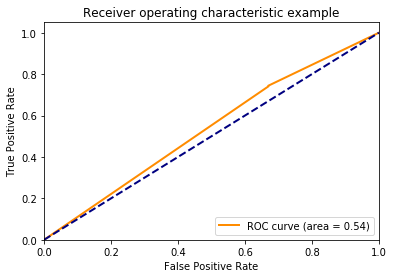

In [188]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % allo)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [189]:
Signal_5indicateurs

,IVV,IWF,IJH,IJR,IWM,IVW,IVV,IWF,IJH,IJR,...,IJH,IJR,IWM,IVW,IVV,IWF,IJH,IJR,IWM,IVW
,Signal_BBAND,Signal_BBAND,Signal_BBAND,Signal_BBAND,Signal_BBAND,Signal_BBAND,Signal_MACD,Signal_MACD,Signal_MACD,Signal_MACD,...,Signal_MFI,Signal_MFI,Signal_MFI,Signal_MFI,Signal_STOK,Signal_STOK,Signal_STOK,Signal_STOK,Signal_STOK,Signal_STOK
Date,,,,,,,,,,,,,,,,,,,,,
2018-04-02,0,0,0,0,0,0,0,0,0,0,...,-1,-1,-1,-1,0,0,0,0,1,0
2018-04-03,0,0,0,0,0,0,1,1,1,1,...,-1,-1,-1,-1,-1,-1,0,-1,-1,-1
2018-04-04,0,0,0,0,0,0,1,1,1,1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
2018-04-05,0,0,0,0,0,0,1,1,1,1,...,-1,-1,-1,-1,0,0,0,-1,-1,0
2018-04-06,0,0,0,0,0,0,1,1,1,1,...,-1,-1,-1,-1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-31,1,1,1,1,1,1,-1,-1,-1,-1,...,0,0,0,0,1,1,0,0,0,1
2020-04-01,1,1,1,1,1,1,-1,-1,-1,-1,...,0,0,0,-1,0,0,0,0,0,0


In [190]:
df_describe

,count,mean,std,min,25%,50%,75%,max
IVV,508.0,281.227479,22.141206,223.251190,265.030617,279.527069,294.454803,337.763702
IWF,508.0,152.149583,14.001157,120.064903,142.041210,151.022743,159.828915,191.721085
IJH,508.0,186.992008,13.509868,121.026871,182.389786,188.955429,193.929939,209.329269
IJR,508.0,77.546045,6.375664,48.878159,75.331472,77.751007,81.891605,87.845085
IWM,508.0,152.596038,11.914244,99.515213,148.485188,153.545708,161.356392,169.051758
IVW,508.0,170.751140,13.962364,137.721390,159.909267,170.341827,179.314789,209.909103


In [191]:
#X = np.array(Data.drop(columns='Adj Close'))
df_model = pd.DataFrame(Data)
df_model

IWM                                                  \
                  Open        High         Low       Close   Adj Close   
Date                                                                     
2018-04-02  151.520004  152.070007  147.179993  148.130005  144.210403   
2018-04-03  149.020004  150.600006  148.300003  150.250000  146.274307   
2018-04-04  148.500000  152.580002  148.270004  152.160004  148.133759   
2018-04-05  153.039993  153.610001  152.320007  153.419998  149.360413   
2018-04-06  152.369995  153.399994  149.149994  150.360001  146.381378   
...                ...         ...         ...         ...         ...   
2020-03-31  114.599998  116.169998  111.959999  114.459999  114.459999   
2020-04-01  108.699997  110.379997  105.529999  106.660004  106.660004   
2020-04-02  105.720001  110.389999  104.570000  107.669998  107.669998   
2020-04-03  106.589996  108.000000  102.599998  104.620003  104.620003   
2020-04-06  109.089996  113.339996  109.058098  112.629997  112.629997   

                             IJH                                      ...  \
              Volume        Open        High         Low       Close  ...   
Date                                                                  ...   
2018-04-02  35040700  187.070007  187.490005  181.690002  183.169998  ...   
2018-04-03  29857800  184.279999  186.330002  183.360001  185.699997  ...   
2018-04-04  29619700  183.339996  187.639999  182.910004  187.339996  ...   
2018-04-05  17301600  188.339996  189.229996  187.509995  188.759995  ...   
2018-04-06  25762700  187.559998  188.529999  183.589996  185.009995  ...   
...              ...         ...         ...         ...         ...  ...   
2020-03-31  52948000  144.899994  145.970001  141.669998  143.860001  ...   
2020-04-01  54224200  137.130005  139.020004  134.300003  135.429993  ...   
2020-04-02  43774200  134.860001  140.190002  133.460007  136.880005  ...   
2020-04-03  42176800  136.059998  137.639999  131.779999  133.179993  ...   
2020-04-06  46051429  138.949997  144.419998  138.830002  143.899994  ...   

                   IWF                                          IVW  \
                   Low       Close   Adj Close   Volume        Open   
Date                                                                  
2018-04-02  131.509995  132.800003  129.831482  2531900  154.369995   
2018-04-03  132.410004  134.339996  131.337021  1946800  152.369995   
2018-04-04  131.809998  136.130005  133.087051  1966700  150.559998   
2018-04-05  136.259995  137.080002  134.015823  1168000  156.339996   
2018-04-06  133.080002  133.940002  130.945984  2229700  154.710007   
...                ...         ...         ...      ...         ...   
2020-03-31  150.000000  150.649994  150.649994  2936500  166.979996   
2020-04-01  142.889999  144.160004  144.160004  2030400  158.839996   
2020-04-02  142.869995  146.860001  146.860001  2562600  156.850006   
2020-04-03  142.929993  144.589996  144.589996  1131600  160.669998   
2020-04-06  149.470001  155.130005  155.130005  2469878  164.850006   

                                                                     
                  High         Low       Close   Adj Close   Volume  
Date                                                                 
2018-04-02  154.910004  149.750000  151.320007  146.936676  1968400  
2018-04-03  153.589996  150.850006  153.169998  148.733047  2403100  
2018-04-04  155.500000  150.240005  155.110001  150.616867  1559500  
2018-04-05  156.869995  155.210007  156.080002  151.558777   742300  
2018-04-06  155.789993  151.440002  152.380005  147.965958  1439200  
...                ...         ...         ...         ...      ...  
2020-03-31  168.850006  164.220001  165.050003  165.050003  1668700  
2020-04-01  161.600006  156.509995  158.000000  158.000000  1504500  
2020-04-02  161.460007  156.750000  161.360001  161.360001  1111100  
2020-04-03  161.839996  157.039993  159.020004  159.020004   889500 

Separation de l'echntillon - 70% echantillon d'entrainement et 30%  echantillon de test

In [192]:
#df_model.columns
X = np.array(Signal_5indicateurs["IWM"])
#X = df_model["IWM"].drop(columns='Adj Close')
#X.astype(int)

In [193]:
#o	Vous calculez la performance de votre stratégie en utilisant le ‘’Adj Close’’.
Y= df_model["IWM"]['Adj Close']
#Y.astype(int)

In [194]:
from sklearn.model_selection import train_test_split

trainX, testX, trainY, testY = train_test_split(X, Y, test_size = 0.30, random_state = 42)

Modele Logit

In [195]:
#https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
from sklearn.linear_model import LogisticRegression
ModeleLogit = LogisticRegression()

# PROBLEME JE DOIS CONVERTIR EN INT POUR UTILISER 
from sklearn import utils
newTrainX = trainX.astype('int')
newTrainY = trainY.astype('int')
newTestX = testX.astype('int')
newTestY = testY.astype('int')
#print(utils.multiclass.type_of_target(newTrainX))
#print(utils.multiclass.type_of_target(newTrainY))


ModeleLogit.fit(newTrainX, newTrainY)
ModeleLogit.score(newTrainX, newTrainY)


C:\Users\15144\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\15144\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.14084507042253522

In [196]:
predictions = ModeleLogit.predict(newTestX)

TrainScores = ModeleLogit.score(newTrainX, newTrainY)
print('Train score=',TrainScores)

TestsScore = ModeleLogit.score(newTestX, newTestY)
print('Test score=',TestsScore)


Train score= 0.14084507042253522
Test score= 0.0457516339869281


In [197]:
#Pou le premier modele, nous allons utilisé l’indice AIC (Akaike).


# 1.	Vous partez de vos résultats et calculez la valeur de l’indice AIC.
resid = newTestY - predictions
sse = sum(resid**2)
k=newTrainX.shape[1] 
AIC= 2*k - 2*np.log(sse)
print('AIC=',AIC)

AIC= -10.321910465788584


In [198]:
coefficient = ModeleLogit.coef_

In [199]:
coefficient

array([[-1.59738824e+00, -3.51381456e-01,  4.15346716e-01,
        -6.61710807e-02,  1.07057599e-01],
       [-1.65832804e+00, -3.43574171e-01,  3.54364667e-01,
        -6.98717420e-02,  4.96570557e-01],
       [-1.65375750e+00, -4.12179069e-01, -2.54527509e-01,
         5.93411719e-02,  1.66035712e-01],
       [-1.65375750e+00, -4.12179069e-01, -2.54527509e-01,
         5.93411719e-02,  1.66035712e-01],
       [-1.65927167e+00, -2.25150163e-01,  2.10895650e-01,
         4.81698242e-01,  4.93874857e-01],
       [-1.48314613e+00, -6.08912969e-01, -2.53114643e-01,
        -2.17877997e-02, -1.79906751e-01],
       [-1.61423876e+00, -4.13450625e-01, -1.97069973e-01,
         6.21990652e-02, -2.16845160e-01],
       [-1.60091512e+00, -2.32754107e-01,  2.74164639e-01,
         4.84792532e-01,  1.02821993e-01],
       [-1.65927167e+00, -2.25150163e-01,  2.10895650e-01,
         4.81698242e-01,  4.93874857e-01],
       [-1.34099286e+00, -5.21392882e-01,  6.21638139e-03,
         7.61270760e-01

In [200]:
MoyenneCoefficient = coefficient.mean(axis = 0)

In [201]:
MoyenneCoefficient

array([-1.28975793, -0.11484016, -0.13698254,  0.14351163,  0.1025746 ])

In [202]:
#On enleve les colonnes qui ont un coefficient negatif !
DataAmeliorer = Signal_5indicateurs["IWM"]
print("On enleve:")
DataAmeliorer
for i in range(0,len(MoyenneCoefficient)):
    if MoyenneCoefficient[i] < 0:
        sigle = DataAmeliorer.columns[i]
        print(sigle)
        DataAmeliorer = DataAmeliorer.drop(DataAmeliorer.columns[i], axis="columns")
        
print("nouvelle donnees")
DataAmeliorer

On enleve:
Signal_BBAND
Signal_RSI
Signal_STOK
nouvelle donnees


,Signal_MACD,Signal_MFI
Date,,
2018-04-02,0,-1
2018-04-03,1,-1
2018-04-04,1,-1
2018-04-05,1,-1
2018-04-06,1,-1
...,...,...
2020-03-31,-1,0
2020-04-01,-1,0
2020-04-02,-1,0


Maintenant on re essaye de faire tourner le model

In [210]:
X = DataAmeliorer
Y= df_model["IWM"]['Adj Close']
trainAmelioreX, testAmelioreX, trainAmelioreY, testAmelioreY = train_test_split(X, Y, test_size = 0.30, random_state = 42)

newTrainAmelioreX = trainAmelioreX.astype('int')
newTrainAmelioreY = trainAmelioreY.astype('int')
newTestAmelioreX = testAmelioreX.astype('int')
newTestAmelioreY = testAmelioreY.astype('int')

In [211]:
from sklearn.linear_model import LogisticRegression
from sklearn.exceptions import NotFittedError

nouveauModeleLogit = LogisticRegression()
nouveauModeleLogit.fit(newTrainAmelioreX, newTrainAmelioreY)
nouveauModeleLogit.score(newTrainAmelioreX, newTrainAmelioreY)





C:\Users\15144\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\15144\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.12112676056338029

In [212]:

try:
    ModeleLogit.fit(newTrainAmelioreX, newTrainAmelioreY)
    ModeleLogit.score(newTrainAmelioreX, newTrainAmelioreY)
    
    predictions = nouveauModeleLogit.predict(newTestAmelioreX)
    TrainScores = nouveauModeleLogit.score(newTrainAmelioreX, newTrainAmelioreY)
    print('Train score=',TrainScores)

    TestsScore = nouveauModeleLogit.score(newTestAmelioreX, newTestAmelioreY)
    print('Test score=',TestsScore)
except NotFittedError as e:
    print(repr(e))

Train score= 0.12112676056338029
Test score= 0.0457516339869281


C:\Users\15144\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\15144\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [213]:
resid = newTestAmelioreY - predictions
sse = sum(resid**2)
k=newTrainAmelioreX.shape[1] 
AIC= 2*k - 2*np.log(sse)
print('AIC=',AIC)

AIC= -16.343897157081596
